In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("/content/gdrive/My Drive/Semester 5/5_1_1_Data Mining/Car_Insurance_Claim_column.csv", delimiter = ";")

print(dataset)

print(dataset.info())
print(dataset.describe())

#Change value categorical to numerical
nama_kolom = dataset.columns
print(nama_kolom)

          ID    AGE  GENDER  ... DUIS PAST_ACCIDENTS OUTCOME
0     569520    65+  female  ...    0              0     0.0
1     750365  16-25    male  ...    0              0     1.0
2     199901  16-25  female  ...    0              0     0.0
3     478866  16-25    male  ...    0              0     0.0
4     731664  26-39    male  ...    0              1     1.0
...      ...    ...     ...  ...  ...            ...     ...
9995  323164  26-39  female  ...    0              1     0.0
9996  910346  26-39  female  ...    0              0     0.0
9997  468409  26-39    male  ...    0              0     0.0
9998  903459  26-39  female  ...    0              1     1.0
9999  442696  26-39  female  ...    0              0     0.0

[10000 rows x 19 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 n

In [ ]:
#Encode categorical features as an integer array (TRANFORMATION)
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dataset["AGE"] = ord_enc.fit_transform(dataset[["AGE"]])
dataset["GENDER"] = ord_enc.fit_transform(dataset[["GENDER"]])
dataset["RACE"] = ord_enc.fit_transform(dataset[["RACE"]])
dataset["DRIVING_EXPERIENCE"] = ord_enc.fit_transform(dataset[["DRIVING_EXPERIENCE"]])
dataset["EDUCATION"] = ord_enc.fit_transform(dataset[["EDUCATION"]])
dataset["INCOME"] = ord_enc.fit_transform(dataset[["INCOME"]])
dataset["VEHICLE_YEAR"] = ord_enc.fit_transform(dataset[["VEHICLE_YEAR"]])
dataset["VEHICLE_TYPE"] = ord_enc.fit_transform(dataset[["VEHICLE_TYPE"]])

dataset.head(20)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3.0,0.0,0.0,0.0,0.0,2.0,0.629027,1.0,0.0,0.0,1.0,10238,12000.0,0.0,0,0,0,0.0
1,750365,0.0,1.0,0.0,0.0,1.0,1.0,0.357757,0.0,1.0,0.0,0.0,10238,16000.0,0.0,0,0,0,1.0
2,199901,0.0,0.0,0.0,0.0,0.0,3.0,0.493146,1.0,1.0,0.0,0.0,10238,11000.0,0.0,0,0,0,0.0
3,478866,0.0,1.0,0.0,0.0,2.0,3.0,0.206013,1.0,1.0,0.0,1.0,32765,11000.0,0.0,0,0,0,0.0
4,731664,1.0,1.0,0.0,1.0,1.0,3.0,0.388366,1.0,1.0,0.0,0.0,32765,12000.0,0.0,2,0,1,1.0
5,877557,2.0,0.0,0.0,2.0,0.0,2.0,0.619127,1.0,0.0,0.0,1.0,10238,13000.0,0.0,3,0,3,0.0
6,930134,3.0,1.0,0.0,3.0,0.0,2.0,0.492944,0.0,0.0,1.0,1.0,10238,13000.0,0.0,7,0,3,0.0
7,461006,1.0,0.0,0.0,0.0,2.0,3.0,0.468689,0.0,0.0,0.0,1.0,10238,14000.0,0.0,0,0,0,1.0
8,68366,2.0,0.0,0.0,2.0,2.0,3.0,0.521815,0.0,1.0,1.0,0.0,10238,13000.0,0.0,0,0,0,0.0
9,445911,2.0,0.0,0.0,0.0,0.0,2.0,0.561531,1.0,1.0,0.0,1.0,32765,11000.0,0.0,0,0,0,1.0


In [ ]:
#Alternative to Handle Missing Values(CLEANING)
#Drop NA 
data_cleaned_dropNA = dataset.dropna()
#print(data_cleaned_dropNA)
#print(data_cleaned_dropNA.shape)

#Fill NA with Mean Values 
data_cleaned_Mean = dataset.fillna(dataset.mean())
#data_cleaned_Mean.head(20)

#Fill NA with Median Values
data_cleaned_Median = dataset.fillna(dataset.median())
#data_cleaned_Median.head(20)

#Fill NA with Max Values
data_cleaned_Max = dataset.fillna(dataset.max())
#data_cleaned_Max.head(20)

#Fill NA with Min Values
data_cleaned_Min = dataset.fillna(dataset.min())
#data_cleaned_Min.head(20)

#Fill NA with Std Values
data_cleaned_Std = dataset.fillna(dataset.std())
#data_cleaned_Std.head(20)

#Fill NA with Quantile 25% Values
data_cleaned_q25 = dataset.fillna(dataset.quantile(0.25))
#data_cleaned_q25.head(20)

#Fill NA with Quantile 50% Values
data_cleaned_q50 = dataset.fillna(dataset.quantile(0.50))
#data_cleaned_q50.head(20)

#Fill NA with Quantile 75% Values
data_cleaned_q75 = dataset.fillna(dataset.quantile(0.75))
#data_cleaned_q75.head(20)

#Fill NA with KNN Values
data_NA = dataset[dataset.isna().any(axis=1)]
#data_NA.head(20)
data_NA = data_NA.reset_index(drop=True)

X_train = data_cleaned_dropNA.drop(['ID','CREDIT_SCORE','OUTCOME','ANNUAL_MILEAGE','POSTAL_CODE'], axis=1)
y_test_credit = data_cleaned_dropNA['CREDIT_SCORE']
y_test_annual = data_cleaned_dropNA['ANNUAL_MILEAGE']

X_test = data_NA.drop(['ID','CREDIT_SCORE','OUTCOME','ANNUAL_MILEAGE','POSTAL_CODE'], axis=1)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_test_credit)
print(utils.multiclass.type_of_target(y_test_credit))
print(utils.multiclass.type_of_target(y_test_credit.astype('float')))
print(utils.multiclass.type_of_target(encoded))

neigh.fit(X_train, encoded)
y_pred_credit = neigh.predict(X_test)
#print(neigh.predict(y_pred_credit))

neigh.fit(X_train, y_test_annual)
y_pred_annual = neigh.predict(X_test)
#print(neigh.predict(y_pred_annual))

for idx, x in enumerate(data_NA['CREDIT_SCORE']):
  if (pd.isna(x)):
    data_NA.CREDIT_SCORE[idx] = y_pred_credit[idx]

for idx, x in enumerate(data_NA['ANNUAL_MILEAGE']):
  if (pd.isna(x)):
    data_NA.ANNUAL_MILEAGE[idx] = y_pred_annual[idx]

#data_NA.head(20)
dataset_KNN = data_cleaned_dropNA.append(data_NA)

continuous
continuous
multiclass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Test dataset with ....
dataset = dataset_KNN

#Checking Correlation
dataset.corr(method ='kendall')

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.010276,-0.005975,-0.004859,0.004124,-0.006835,-0.004557,-0.003669,0.007477,0.002680,0.012075,0.001023,0.004978,-0.000548,0.005052,0.004730,0.011791,-0.002712,-0.008513
AGE,0.010276,1.000000,0.005198,-0.010371,0.653530,0.132062,0.118064,0.308273,0.249605,-0.215875,0.352418,0.351571,0.007898,-0.214690,-0.007749,0.446573,0.267922,0.408361,-0.410326
GENDER,-0.005975,0.005198,1.000000,-0.006711,0.008077,0.078353,0.012267,-0.054742,0.007385,-0.010674,0.008393,-0.002640,-0.002838,-0.017197,-0.000022,0.150748,0.087844,0.188388,0.107208
RACE,-0.004859,-0.010371,-0.006711,1.000000,-0.017377,-0.038896,-0.002293,-0.032973,-0.034738,0.020895,-0.021597,0.007575,0.006469,0.003855,0.006089,-0.005889,-0.014070,-0.005139,0.008280
DRIVING_EXPERIENCE,0.004124,0.653530,0.008077,-0.017377,1.000000,0.080225,0.070623,0.215912,0.188031,-0.148854,0.246725,0.256698,0.006647,-0.144205,-0.005014,0.663490,0.385065,0.609989,-0.479347
EDUCATION,-0.006835,0.132062,0.078353,-0.038896,0.080225,1.000000,0.072604,0.135240,0.113673,-0.106764,0.098630,0.070111,0.011969,-0.061096,0.000492,0.069678,0.051725,0.065690,-0.086633
INCOME,-0.004557,0.118064,0.012267,-0.002293,0.070623,0.072604,1.000000,0.053690,0.057095,-0.069095,0.062109,0.049541,0.018689,-0.039061,-0.010981,0.052009,0.048758,0.045120,-0.056798
CREDIT_SCORE,-0.003669,0.308273,-0.054742,-0.032973,0.215912,0.135240,0.053690,1.000000,0.205244,-0.177441,0.185461,0.149728,0.006126,-0.099026,-0.007110,0.157439,0.090926,0.131473,-0.221718
VEHICLE_OWNERSHIP,0.007477,0.249605,0.007385,-0.034738,0.188031,0.113673,0.057095,0.205244,1.000000,-0.158579,0.175626,0.125990,-0.001284,-0.082689,0.005647,0.143233,0.089675,0.127360,-0.378921
VEHICLE_YEAR,0.002680,-0.215875,-0.010674,0.020895,-0.148854,-0.106764,-0.069095,-0.177441,-0.158579,1.000000,-0.129638,-0.105189,0.001537,0.058915,0.025185,-0.112399,-0.050499,-0.103444,0.294178


In [ ]:
#Dimention Checking
print("Dataset Shape : ", dataset.shape)
print("\nDataset Info : ")
print(dataset.info())
print("\nDataset Describe : ", dataset.describe())

Dataset Shape :  (10000, 19)

Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 1850
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  float64
 2   GENDER               10000 non-null  float64
 3   RACE                 10000 non-null  float64
 4   DRIVING_EXPERIENCE   10000 non-null  float64
 5   EDUCATION            10000 non-null  float64
 6   INCOME               10000 non-null  float64
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  float64
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  floa

Shape Awal: (10000, 19)
After AGE: (10000, 19)
After GENDER: (10000, 19)
After RACE: (10000, 19)
After DRIVING_EXPERIENCE: (10000, 19)
After EDUCATION: (10000, 19)
After INCOME: (10000, 19)
After CREDIT_SCORE: (9012, 19)
After VEHICLE_OWNERSHIP: (9012, 19)
After VEHICLE_YEAR: (9012, 19)
After MARRIED: (9012, 19)
After ANNUAL_MILEAGE: (8754, 19)
After VEHICLE_TYPE: (8336, 19)
After SPEEDING_VIOLATIONS: (7845, 19)
After DUIS: (7845, 19)
After PAST_ACCIDENTS: (7845, 19)


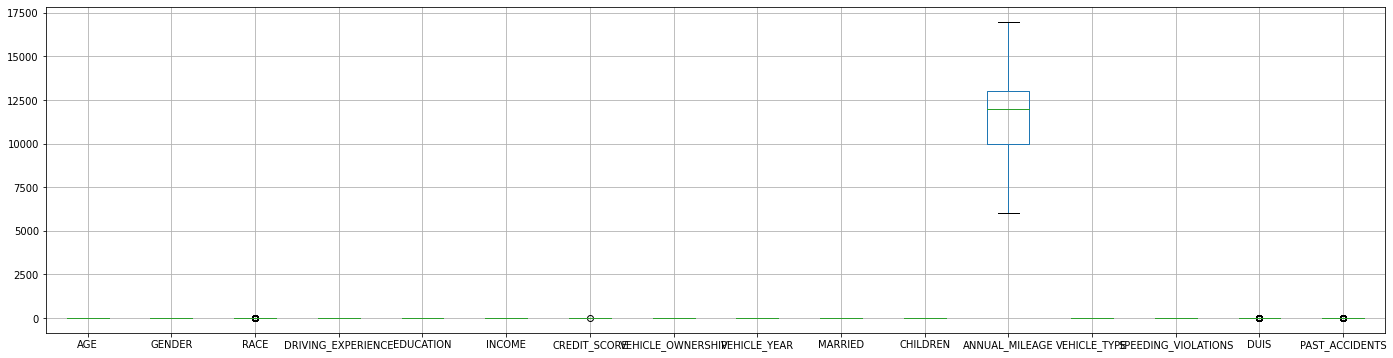

In [ ]:
#Outliers
print("Shape Awal:", dataset.shape)

Q1 = dataset['AGE'].quantile(0.25)
Q3 = dataset['AGE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['AGE'] < (Q1 - 1.5 * IQR)) | (dataset['AGE'] > (Q3 + 1.5 * IQR)))]
print("After AGE:", dataset.shape)

Q1 = dataset['GENDER'].quantile(0.25)
Q3 = dataset['GENDER'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['GENDER'] < (Q1 - 1.5 * IQR)) | (dataset['GENDER'] > (Q3 + 1.5 * IQR)))]
print("After GENDER:", dataset.shape)

Q1 = dataset['RACE'].quantile(0.25)
Q3 = dataset['RACE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['RACE'] < (Q1 - 1.5 * IQR)) | (dataset['RACE'] > (Q3 + 1.5 * IQR)))]
print("After RACE:", dataset.shape)

Q1 = dataset['DRIVING_EXPERIENCE'].quantile(0.25)
Q3 = dataset['DRIVING_EXPERIENCE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['DRIVING_EXPERIENCE'] < (Q1 - 1.5 * IQR)) | (dataset['DRIVING_EXPERIENCE'] > (Q3 + 1.5 * IQR)))]
print("After DRIVING_EXPERIENCE:", dataset.shape)

Q1 = dataset['EDUCATION'].quantile(0.25)
Q3 = dataset['EDUCATION'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['EDUCATION'] < (Q1 - 1.5 * IQR)) | (dataset['EDUCATION'] > (Q3 + 1.5 * IQR)))]
print("After EDUCATION:", dataset.shape)

Q1 = dataset['INCOME'].quantile(0.25)
Q3 = dataset['INCOME'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['INCOME'] < (Q1 - 1.5 * IQR)) | (dataset['INCOME'] > (Q3 + 1.5 * IQR)))]
print("After INCOME:", dataset.shape)

Q1 = dataset['CREDIT_SCORE'].quantile(0.25)
Q3 = dataset['CREDIT_SCORE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['CREDIT_SCORE'] < (Q1 - 1.5 * IQR)) | (dataset['CREDIT_SCORE'] > (Q3 + 1.5 * IQR)))]
print("After CREDIT_SCORE:", dataset.shape)

Q1 = dataset['VEHICLE_OWNERSHIP'].quantile(0.25)
Q3 = dataset['VEHICLE_OWNERSHIP'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['VEHICLE_OWNERSHIP'] < (Q1 - 1.5 * IQR)) | (dataset['VEHICLE_OWNERSHIP'] > (Q3 + 1.5 * IQR)))]
print("After VEHICLE_OWNERSHIP:", dataset.shape)

Q1 = dataset['VEHICLE_YEAR'].quantile(0.25)
Q3 = dataset['VEHICLE_YEAR'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['VEHICLE_YEAR'] < (Q1 - 1.5 * IQR)) | (dataset['VEHICLE_YEAR'] > (Q3 + 1.5 * IQR)))]
print("After VEHICLE_YEAR:", dataset.shape)

Q1 = dataset['MARRIED'].quantile(0.25)
Q3 = dataset['MARRIED'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['MARRIED'] < (Q1 - 1.5 * IQR)) | (dataset['MARRIED'] > (Q3 + 1.5 * IQR)))]
print("After MARRIED:", dataset.shape)

Q1 = dataset['ANNUAL_MILEAGE'].quantile(0.25)
Q3 = dataset['ANNUAL_MILEAGE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['ANNUAL_MILEAGE'] < (Q1 - 1.5 * IQR)) | (dataset['ANNUAL_MILEAGE'] > (Q3 + 1.5 * IQR)))]
print("After ANNUAL_MILEAGE:", dataset.shape)

Q1 = dataset['VEHICLE_TYPE'].quantile(0.25)
Q3 = dataset['VEHICLE_TYPE'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['VEHICLE_TYPE'] < (Q1 - 1.5 * IQR)) | (dataset['VEHICLE_TYPE'] > (Q3 + 1.5 * IQR)))]
print("After VEHICLE_TYPE:", dataset.shape)

Q1 = dataset['SPEEDING_VIOLATIONS'].quantile(0.25)
Q3 = dataset['SPEEDING_VIOLATIONS'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['SPEEDING_VIOLATIONS'] < (Q1 - 1.5 * IQR)) | (dataset['SPEEDING_VIOLATIONS'] > (Q3 + 1.5 * IQR)))]
print("After SPEEDING_VIOLATIONS:", dataset.shape)

Q1 = dataset['DUIS'].quantile(0.25)
Q3 = dataset['DUIS'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['DUIS'] < (Q1 - 1.5 * IQR)) | (dataset['DUIS'] > (Q3 + 1.5 * IQR)))]
print("After DUIS:", dataset.shape)

Q1 = dataset['PAST_ACCIDENTS'].quantile(0.25)
Q3 = dataset['PAST_ACCIDENTS'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['PAST_ACCIDENTS'] < (Q1 - 1.5 * IQR)) | (dataset['PAST_ACCIDENTS'] > (Q3 + 1.5 * IQR)))]
print("After PAST_ACCIDENTS:", dataset.shape)

dataset_new = dataset.drop(['ID','OUTCOME','POSTAL_CODE'], axis=1)
dataset_new.boxplot(figsize=(24,6))

In [ ]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit_transform(dataset)

dataset = pd.DataFrame(scaler)
dataset.columns = nama_kolom
dataset.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0.569490,1.000000,0.0,0.0,0.000000,0.0,0.666667,0.608823,1.0,0.0,0.0,1.0,0.000000,0.545455,0.0,0.0,0.0,0.000000,0.0
1,0.750358,0.000000,1.0,0.0,0.000000,0.5,0.333333,0.289000,0.0,1.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,0.000000,1.0
2,0.199825,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.448621,1.0,1.0,0.0,0.0,0.000000,0.454545,0.0,0.0,0.0,0.000000,0.0
3,0.478825,0.000000,1.0,0.0,0.000000,1.0,1.000000,0.110096,1.0,1.0,0.0,1.0,0.275179,0.454545,0.0,0.0,0.0,0.000000,0.0
4,0.731654,0.333333,1.0,0.0,0.333333,0.5,1.000000,0.325087,1.0,1.0,0.0,0.0,0.275179,0.545455,0.0,0.4,0.0,0.066667,1.0


In [ ]:
#Deduplikasi Data
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(5239, 19)


In [ ]:
#Library
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

#Function
def reshape(lst1, lst2):
    last = 0
    res = []
    for ele in list1:
        res.append(lst2[last : last + len(ele)])
        last += len(ele)          
    return res

#Spliting Data
X = dataset.drop(['ID','OUTCOME','POSTAL_CODE'], axis=1)
y = dataset['OUTCOME']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Naive Bayes
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(y_pred)
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_pred))

[1. 1. 1. ... 1. 1. 0.]
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       640
         1.0       0.69      0.75      0.72       408

    accuracy                           0.77      1048
   macro avg       0.76      0.77      0.77      1048
weighted avg       0.78      0.77      0.78      1048


Confusion Matrix: 
 [[504 136]
 [100 308]]


In [ ]:
#Input Naive Bayes
list1 = [['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','CREDIT_SCORE','VEHICLE_OWNERSHIP','VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE','VEHICLE_TYPE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']]
list2 = []

for i in range(0, 16):
    ele  = float(input())
    list2.append(ele)
a = reshape(list1, list2)
print(a)

y_pred = gnb.fit(X_train, y_train).predict(a)

print(y_pred)


[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']] : 
0
[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']] : 
0
[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']] : 
0
[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

print(model.score(X_train, y_train))
print(classification_report(y_test, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

[1. 1. 0. ... 1. 1. 0.]
1.0
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       640
         1.0       0.63      0.68      0.65       408

    accuracy                           0.72      1048
   macro avg       0.71      0.71      0.71      1048
weighted avg       0.72      0.72      0.72      1048

Confusion Matrix: 
 [[479 161]
 [132 276]]


In [ ]:
#Input Decision Tree
from sklearn.tree import DecisionTreeClassifier

list1 = [['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','CREDIT_SCORE','VEHICLE_OWNERSHIP','VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE','VEHICLE_TYPE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']]
list2 = []

for i in range(0, 16):
    ele = float(input())
    list2.append(ele)
a = reshape(list1, list2)
print(a)

model = model.fit(X_train, y_train)
y_pred = model.predict(a)
print(y_pred)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
